In [1]:
import tweepy
import json
import pandas as pd
from matplotlib import pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import CSV file into Data Frame
popular_tweeters = pd.read_csv("../Resources/PopularAccounts.csv", dtype=str)
popular_tweeters.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,NaN,NaN,NaN,NaN,NaN
1,justinbieber,NaN,NaN,NaN,NaN,NaN
2,BarackObama,NaN,NaN,NaN,NaN,NaN
3,Taylorswift13,NaN,NaN,NaN,NaN,NaN
4,rihanna,NaN,NaN,NaN,NaN,NaN


In [4]:
# Iterate through DataFrame
for index, row in popular_tweeters.iterrows():
    try:
        # Grab the username
        target_user = row["Screen Name"]

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_tweeters.loc[index, "Real Name"] = user_real_name
        popular_tweeters.loc[index, "Tweets"] = user_tweets
        popular_tweeters.loc[index, "Followers"] = user_followers
        popular_tweeters.loc[index, "Following"] = user_following
        popular_tweeters.loc[index, "Favorites Count"] = user_favorites

    except tweepy.TweepError as e:
        print(f"exception for {row['Screen Name']}: {e}")
        popular_tweeters.drop(labels=index,inplace=True)

In [5]:
# Export the new CSV
popular_tweeters.to_csv("PopularAccounts_New.csv", index=False)

# View the DataFrame
popular_tweeters.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,9321,106908008,216,6131
1,justinbieber,Justin Bieber,30527,104573219,301838,3395
2,BarackObama,Barack Obama,15552,103320798,617742,11
3,Taylorswift13,Taylor Swift,99,83144336,0,468
4,rihanna,Rihanna,10208,88343602,1096,997


In [6]:
# Calculate Averages
average_tweet_count = popular_tweeters["Tweets"].mean()
average_followers = popular_tweeters["Followers"].mean()
average_following_count = popular_tweeters["Following"].mean()
average_favorites_count = popular_tweeters["Favorites Count"].mean()

# Create DataFrame
pd.DataFrame({
    "Average Tweet Count": [average_tweet_count], 
    "Average Follower Count": [average_followers], 
    "Average Following Count": [average_following_count],
    "Average Favorites Count": [average_favorites_count]
})

,Average Tweet Count,Average Follower Count,Average Following Count,Average Favorites Count
0,34004.84,49661958.74,31388.26,1971.4


Text(0.5,1,'Tweet Counts vs Follower Counts')

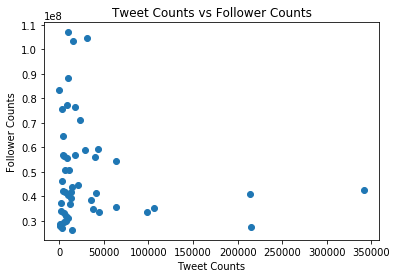

In [7]:
# Plot tweet counts vs followers
plt.scatter(popular_tweeters['Tweets'], popular_tweeters['Followers'])
plt.xlabel("Tweet Counts")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")

Text(0.5,1,'Following Counts vs Follower Counts')

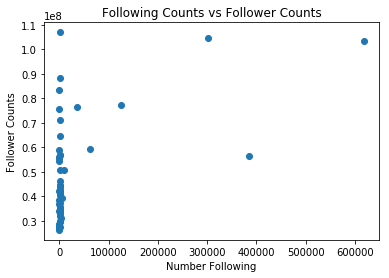

In [8]:
# Plot following vs followers
plt.scatter(popular_tweeters['Following'], popular_tweeters['Followers'])
plt.xlabel("Number Following")
plt.ylabel("Follower Counts")
plt.title("Following Counts vs Follower Counts")

Text(0.5,1,'Favorite Counts vs Follower Counts')

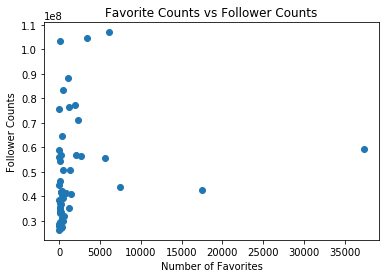

In [9]:
# Plot favorites vs followers
plt.scatter(popular_tweeters['Favorites Count'], popular_tweeters['Followers'])
plt.xlabel("Number of Favorites")
plt.ylabel("Follower Counts")
plt.title("Favorite Counts vs Follower Counts")